In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./datasets/telecom_churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [16]:
X  = df[['account_length', 'customer_service_calls']].values
y = df['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3, random_state=18, stratify=y)

In [17]:
train_accuracies = {}
test_accuraciies = {}
n = np.arange(1,26)

for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_accuracies[i] = knn.score(X_train, y_train)
    test_accuraciies[i] =  knn.score(X_test, y_test)

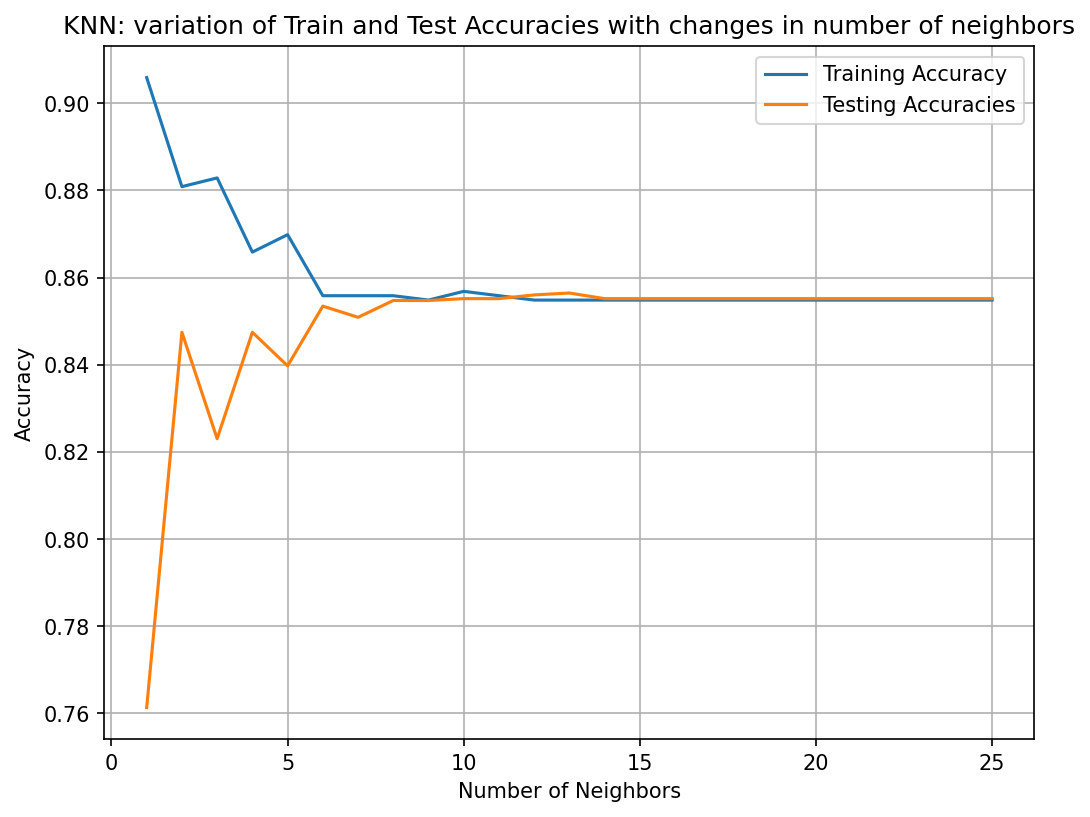

In [18]:
plt.figure(figsize=(8,6), dpi=150)
plt.title("KNN: variation of Train and Test Accuracies with changes in number of neighbors")
plt.plot(n, train_accuracies.values(), label="Training Accuracy")
plt.plot(n, test_accuraciies.values(), label="Testing Accuracies")
plt.grid(True)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

plt.show()